In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# 'MedInc' 변수를 독립 변수로 사용
data = data[['MedInc', 'MedHouseVal']]

In [2]:
data

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [3]:
#결측치를 생성

#결측치를 10%
np.random.seed(42)
missing_rate = 0.1
n_ms_sample = int(np.floor(missing_rate*data.shape[0]))


missing_samples = np.random.choice(data.index, n_ms_sample, replace=False)
data_missing = data.copy()
data_missing.loc[missing_samples, 'MedInc' ] = np.nan

In [4]:
data_missing

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
...,...,...
20635,NaN,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


### 결측치 보간 방법들
- fillna(method = 'bfill') ,뒤의 행 값 대치치 - 결측값이 연속 한 번만 대치된다.
- fillna(method = 'ffill') , 앞 시점 값으로 대치 - 동일
- interpolate(method= '') ,보간법

In [5]:
data_missing.loc[:10,]

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [6]:
data_missing.loc[:10,].fillna(method='bfill')

C:\Users\pitap\AppData\Local\Temp\ipykernel_25812\948011287.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_missing.loc[:10,].fillna(method='bfill')


,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,3.8462,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [7]:
data_missing.loc[:10,].fillna(method='ffill')

C:\Users\pitap\AppData\Local\Temp\ipykernel_25812\2177638490.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_missing.loc[:10,].fillna(method='ffill')


,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,7.2574,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [8]:
#보간법의 디폴트는 선형보간
data_missing.loc[:10,].interpolate()

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.5518,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611



- 보간법 사용 method 참고 
- ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [9]:
data_missing.loc[:10,].interpolate()

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.5518,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


C:\Users\pitap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MedInc', ylabel='Count'>

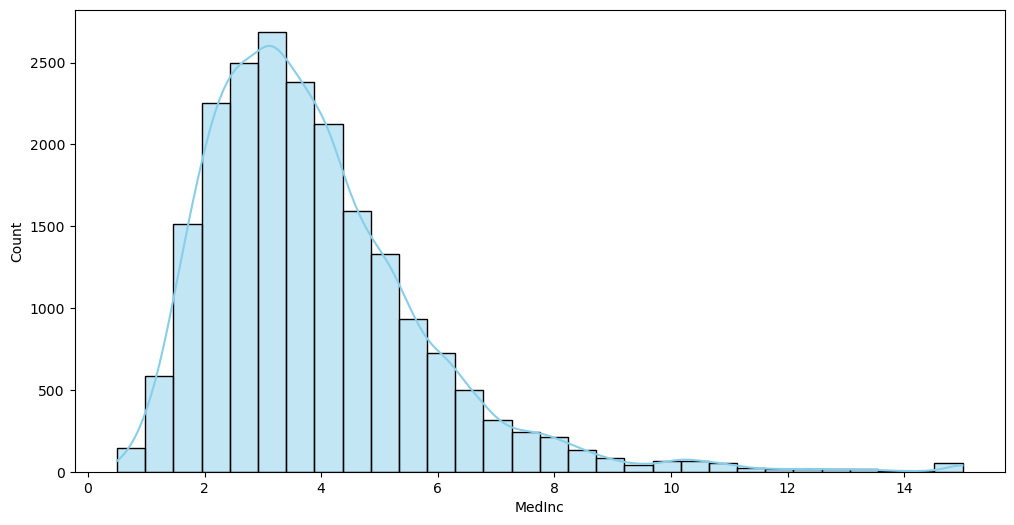

In [10]:
# 결측치의 그래프가 어떤 식으로 분포?
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))

sns.histplot(data['MedInc'],bins = 30, kde=True, color='skyblue')

- 결측치의 기본적인 분포 ( 이 분포가 결측치가 어떤 식으로 처리할 수 있는지 아이디어를 준다.)
- 기초통계치 -> 평균, 분산, 표준편차, 미디안 등등 이 결측치를 채울 수 있는 방향성을 준다.
- 분포에 대한 왜도, 첨도 등으로 확인하기

In [11]:
## 왜도 첨도 확인
# 결측값이 들어가 있으면 계산이 되지 않는다.
from scipy.stats import skew, kurtosis 

medinc_skewness = skew(data['MedInc'])
medinc_kurtosis = kurtosis(data['MedInc'])

In [12]:
print(medinc_skewness)
print(medinc_kurtosis)

1.64653702990008
4.951033760409659


- 왜도 : 왜도는 비대칭성을 나타내는 지표
    -  0에 가까울수록 대칭적인 분포를 의미 값이 커질수록 비대칭성의 증가를 
- 첨도 : 분포의 꼬리에 대한 두께를 나타내는 지표
    - 첨도의 값이 3보다 크면 데이터에 극단적인 값이 많다는 것을 의미 
    
    
- 왼쪽으로 치우쳐 있고, 극단값이 많이 존재 
- 일부 매우 높은 소득 존재 -> 전체 영향을 준다는 것 
- 그럼 어떤 식으로 결측치를 중앙값이나 기타 값을 보간하는 법, 평균 보간하는 법 등이 있는데, 이상치가 이렇게 존재하니깐, 이상치의 영향을 덜 받는 보간법으로 진행하면 더 좋지않을까? , 중앙값이 상대적으로 이상치에 영향 덜 받는다.

### 다양한 결측치 대처 방법으로 성능을 평가해 보자!

In [13]:
## 평균으로 대치

data_mean_imputed = data_missing.copy()
mean_value = data_mean_imputed['MedInc'].mean()
data_mean_imputed['MedInc'] = data_mean_imputed['MedInc'].fillna(mean_value)


# 0값으로 대치 

data_zero_imputed = data_missing.copy()
data_zero_imputed['MedInc'] = data_zero_imputed['MedInc'].fillna(0)


# 보간법 (선형보간)

data_linear_interpolated = data_missing.copy()
data_linear_interpolated['MedInc'] = data_linear_interpolated['MedInc'].interpolate()

In [14]:
## 결측치들의 시각화

def plot_comp(original, imputed, method):
    plt.figure(figsize=(10,6))
    plt.plot(original.index, original['MedInc'],'o', label='Original', alpha=0.3)
    plt.plot(imputed.index, imputed['MedInc'],'o', label=f'Imputed ({method})', alpha=0.3)
    plt.xlabel('Index')
    plt.ylabel('MedInc')
    plt.legend()
    plt.show()

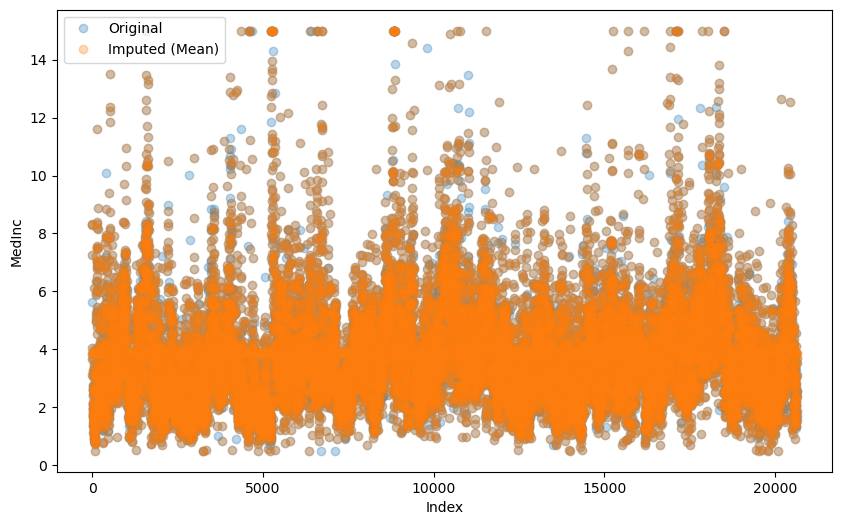

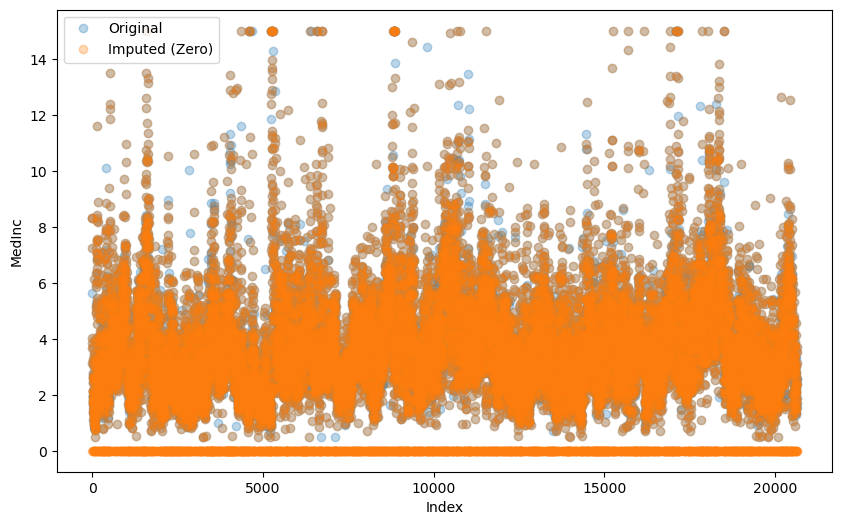

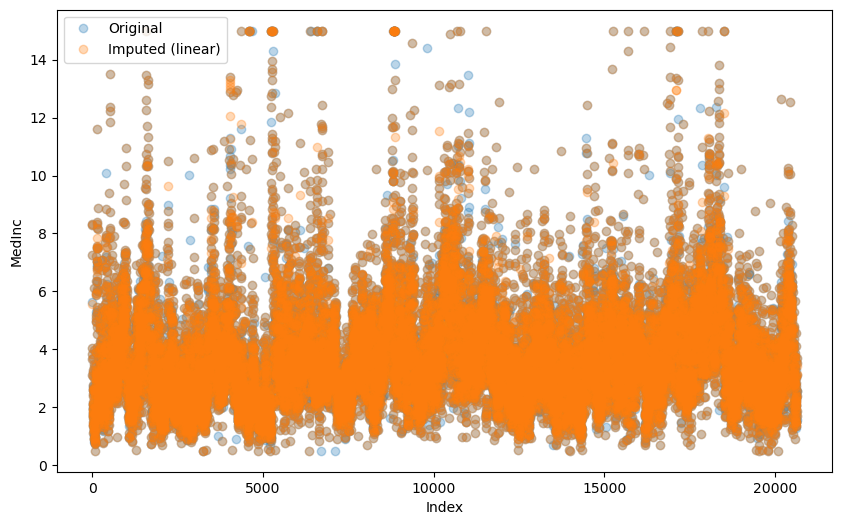

In [15]:
plot_comp(data, data_mean_imputed, 'Mean')
plot_comp(data, data_zero_imputed, 'Zero')
plot_comp(data, data_linear_interpolated, 'linear')

In [16]:
## 실제 성능을 비교해 보자!

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 결측치를 보간-> 결측치를 보간한 데이터 1.평균, 2.0 3.보간법  3가지 방법으로 결측치를 대치한 데이터로 선형회귀 분석을 진행해서 
## 성능이 얼마나 나오는지 확인 ?
## e.g. 10 개 10 개 10개 -> 7:3 으로 각각 나눠서 7로 train, 3으로 평가한다 
## 이 데이터셋으로 학습해서 데이터를 예측해서 평가한다.

## 우리가 사용하는 방식은 아래와 같다.
## y값은 기존에 존재 , 우리가 결측치를 대치하여 만든 데이터로 예측한 값이랑 비교 
# 회귀분석을 통해서 MSE 측정할 것

def per_reg(data, label):
    X= data[['MedInc']]
    y = data['MedHouseVal']
    
    reg = LinearRegression().fit(X,y)
    y_pred = reg.predict(X)
    mse = mean_squared_error(y, y_pred)
    
    return y_pred, mse, reg.coef_[0], reg.intercept_  #예측값, MSE, 계수, 상수들 확인

In [17]:
# 결측치를 대치한 데이터로 예측하여서 비교하자!
y_pred_mean, mse_mean, coef_mean, intercept_mean = per_reg(data_mean_imputed, 'Mean Imputation')
y_pred_zero, mse_zero, coef_zero, intercept_zero = per_reg(data_zero_imputed, 'Zero Imputation')
y_pred_linear, mse_linear, coef_linear, intercept_linear = per_reg(data_linear_interpolated, 'linear Imputation')

In [18]:
#성과 출력
#MSE가 가장 낮아야 성능이 좋다라고 본다.
# 실제값과 - 예측값 = 차이 어떤 게 가장 적냐? 성능을 평가한다.
# 5 - 예측값이 4 = 1
# 5 - 예측값 3 = 2 
# 1과 2중에서 1이 더 잘 맞았다.
# 예측값- 실제값 = 잔차 

print(f'Mean Imputation -MSE: {mse_mean}')
print(f'zero Imputation -MSE: {mse_zero}')
print(f'Linear Imputation -MSE: {mse_linear}')

Mean Imputation -MSE: 0.7614520509063426
zero Imputation -MSE: 0.9296910233890502
Linear Imputation -MSE: 0.7042327660288282


In [19]:
# 시각화
def plot_comp(original, imputed, y_pred, coef, intercept, method):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='MedInc',y='MedHouseVal', data = original, label='Actual Values', alpha=0.3, color='blue')
    sns.scatterplot(x='MedInc',y='MedHouseVal', data = imputed, label=f'Imputed ({method})', alpha=0.3, color='red')
    plt.plot(imputed['MedInc'], y_pred, 'o', color = 'green',label= 'Predicted Values', alpha=0.3)
    plt.plot(imputed['MedInc'], coef * imputed['MedInc']+intercept, color = 'orange',label= 'Regression Line')
    plt.xlabel('MedInc')
    plt.ylabel('MedHouseVal')
    plt.legend()
    plt.show()

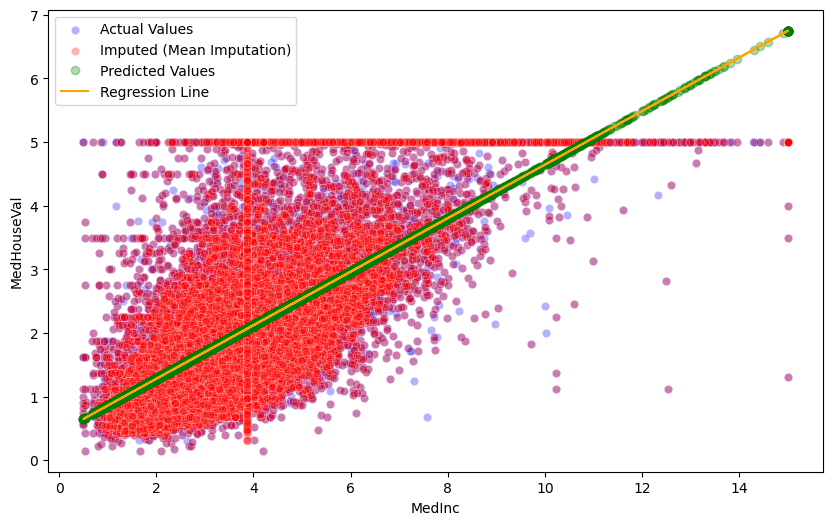

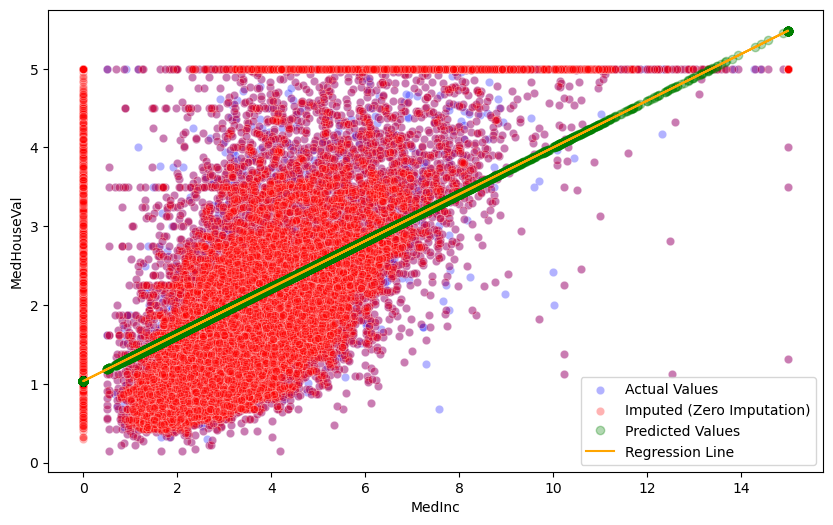

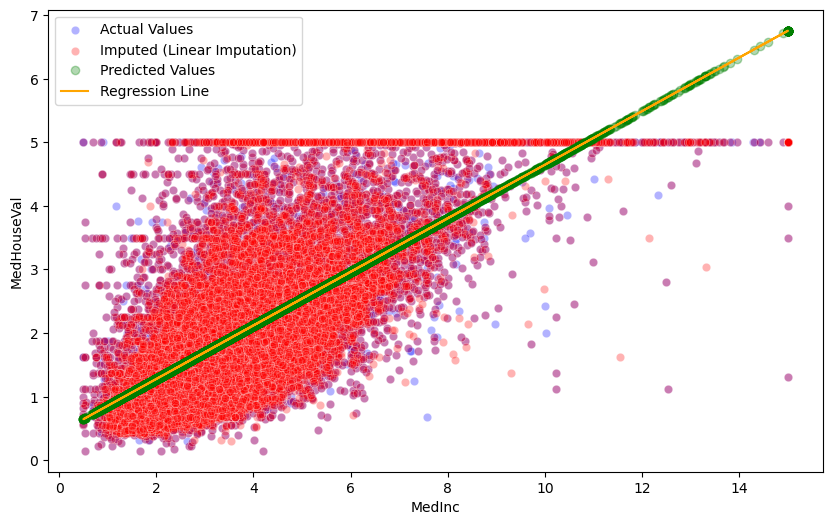

In [20]:
plot_comp(data, data_mean_imputed, y_pred_mean, coef_mean, intercept_mean, 'Mean Imputation')
plot_comp(data, data_zero_imputed, y_pred_zero, coef_zero, intercept_zero, 'Zero Imputation')
plot_comp(data, data_linear_interpolated, y_pred_linear, coef_linear, intercept_linear, 'Linear Imputation')

In [21]:
data

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [22]:
len(y_pred_mean)

20640

In [23]:
mse_mean

0.7614520509063426

In [24]:
coef_mean

0.42070233302220683

In [25]:
intercept_mean

0.43924718782546446

In [26]:
data_mean_imputed

,MedInc,MedHouseVal
0,8.325200,4.526
1,8.301400,3.585
2,7.257400,3.521
3,3.872836,3.413
4,3.846200,3.422
...,...,...
20635,3.872836,0.781
20636,2.556800,0.771
20637,1.700000,0.923
20638,1.867200,0.847


In [27]:
data_linear_interpolated

,MedInc,MedHouseVal
0,8.32520,4.526
1,8.30140,3.585
2,7.25740,3.521
3,5.55180,3.413
4,3.84620,3.422
...,...,...
20635,3.13465,0.781
20636,2.55680,0.771
20637,1.70000,0.923
20638,1.86720,0.847
